In [20]:
import requests
from bs4 import BeautifulSoup
import json
from datetime import datetime

def get_subpages():
    url = "https://liuthetide.com/"
    res = requests.get(url)
    soup = BeautifulSoup(res.content, "html.parser")
    subpage_links = []
    for link in soup.find_all("a"):
        if link.get("href").startswith(url) and link.get("href") != url:
            subpage_links.append(link.get("href"))
    return subpage_links

def get_article_links_and_dates(url):
    articles_dict = {}

    while True:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        articles = soup.find_all('div', {'class': 'post'})

        for article in articles:
            link = article.find('a')['href']
            date_str = article.find('div', {'class': 'post-byline'}).text.split(' on ')[-1]
            try:
                date = datetime.strptime(date_str, '%B %d, %Y')
            except ValueError:
                date = datetime.strptime(date_str, '%b %d, %Y')
            year = date.year

            if year >= 2009:
                key = f"{date.year}_{date.month}_{date.day}"
                if key not in articles_dict:
                    articles_dict[key] = []
                articles_dict[key].append(link)
                print(f"Added link: {link}")

        next_page = soup.find('a', {'class': 'next page-numbers'})
        if not next_page:
            break
        url = next_page['href']

    return articles_dict

In [21]:
if __name__ == '__main__':
    subpages = get_subpages()
    articles_dict = {}

    for subpage in subpages:
        subpage_articles = get_article_links_and_dates(subpage)
        articles_dict.update(subpage_articles)

    with open('liu_article_pages.json', 'w') as f:
        json.dump(articles_dict, f, indent=4)

Added link: https://liuthetide.com/sharks-our-mascot-or-our-killer/
Added link: https://liuthetide.com/the-restrict-act-goodbye-to-tiktok/
Added link: https://liuthetide.com/spring-break-chaos/
Added link: https://liuthetide.com/over-600000-protesters-flood-the-streets-of-israel-demanding-justice-over-the-prime-ministers-judicial-overhaul-plan/
Added link: https://liuthetide.com/four-americans-kidnapped-in-mexico-two-killed-as-responsible-cartel-apologizes/
Added link: https://liuthetide.com/christian-school-shooting-devastates-tennessee-community/
Added link: https://liuthetide.com/liu-students-weigh-in-on-traffic-around-the-island-and-big-apple/
Added link: https://liuthetide.com/marriott-launches-attack-on-human-trafficking-with-training-and-awareness/
Added link: https://liuthetide.com/amc-theatres-rolls-out-unpopular-new-ticketing-policy/
Added link: https://liuthetide.com/spy-balloons-raise-concern-from-coast-to-coast/
Added link: https://liuthetide.com/post-hosts-multicultural-g

In [23]:
from helpers.txt_to_text import get_article_text
from helpers.make_txt_entry import make_txt_entry
import os

school_name = "LIU"
dates = sorted(articles_dict.keys())

for date in reversed(dates):
    articles = articles_dict[date]
    file_path = "journal_data/txt/"+school_name.replace(" ","_")+"/"+date+".txt"
    if(os.path.exists(file_path)):
        print(f"Date {date} already added.")
    else:
        article_text = ""
        for article in articles:
            article_text += get_article_text(article) + "\n"
            
        make_txt_entry(school_name="LIU", publication_date=date, text=article_text)
        print(f"Date {date} added.")


Date 2023_5_4 already added.
Date 2023_4_6 already added.
Date 2023_3_4 already added.
Date 2023_3_24 already added.
Date 2023_2_4 already added.
Date 2023_2_3 already added.
Date 2023_2_19 already added.
Date 2022_9_19 already added.
Date 2022_5_10 already added.
Date 2022_4_23 already added.
Date 2022_4_22 already added.
Date 2022_4_15 already added.
Date 2022_4_13 already added.
Date 2022_4_12 already added.
Date 2022_4_11 already added.
Date 2022_2_24 already added.
Date 2022_2_10 already added.
Date 2022_2_1 already added.
Date 2022_12_6 already added.
Date 2022_12_21 already added.
Date 2022_11_10 already added.
Date 2022_10_31 already added.
Date 2022_10_3 already added.
Date 2022_10_27 already added.
Date 2022_10_14 already added.
Date 2021_9_30 already added.
Date 2021_9_17 already added.
Date 2021_9_16 already added.
Date 2021_9_15 already added.
Date 2021_5_1 already added.
Date 2021_4_9 already added.
Date 2021_4_29 already added.
Date 2021_4_28 already added.
Date 2021_4_2

grouped_data/csv/LIU_Hillel.csv created.
grouped_data/pkl/yearly/LIU_Hillel.pkl being created.


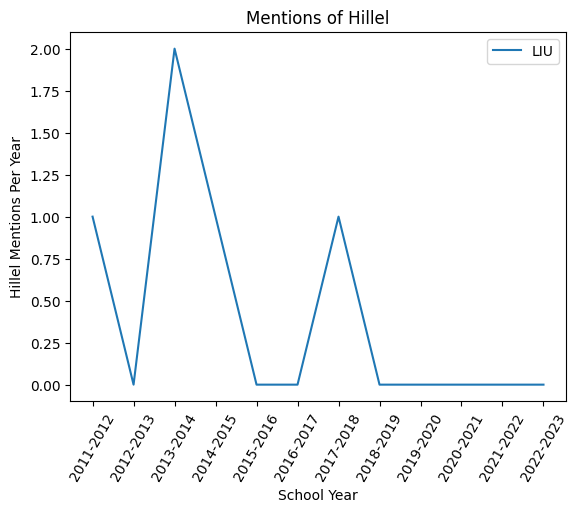

In [24]:
# Hyperparameters to Modify
school_name = 'LIU'
string = "Hillel"
time_slice = 'yearly'

from helpers.graphers import grapher
from helpers.queries import count_query

school_names = [school_name]
save_pattern = '_'.join(school_names)+'_'+string.replace(' ','_')
grapher(school_names=school_names,
        pipeline=[],
        query=count_query(string),
        y_label=f"{string} Mentions Per Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice=time_slice,
        title=f"Mentions of {string}",
        img_path=f"figures/{school_name}/{save_pattern}_{time_slice}.png")

grouped_data/csv/LIU_Palestine.csv created.
grouped_data/pkl/monthly/LIU_Palestine.pkl being created.


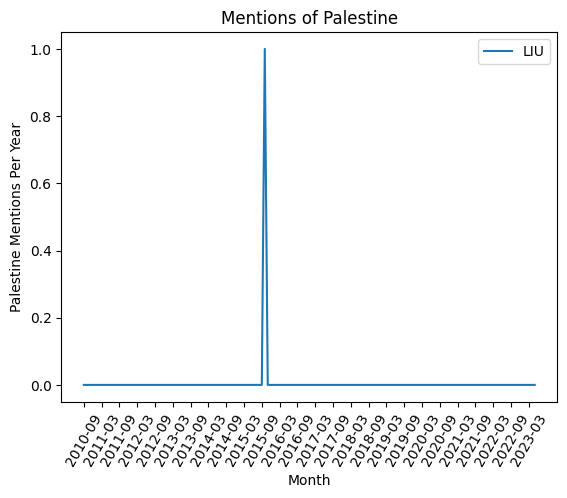

In [4]:
# Hyperparameters to Modify
school_name = 'LIU'
string = "Palestine"
time_slice = 'monthly'

from helpers.graphers import grapher
from helpers.queries import count_query

school_names = [school_name]
save_pattern = '_'.join(school_names)+'_'+string.replace(' ','_')
grapher(school_names=school_names,
        pipeline=[],
        query=count_query(string),
        y_label=f"{string} Mentions Per Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice=time_slice,
        title=f"Mentions of {string}",
        img_path=f"figures/{school_name}/{save_pattern}_{time_slice}.png")

In [ ]:
# Load in the data
import nltk
nltk.download('wordnet')

from helpers.processors import csv_to_positive_articles
from helpers.processors import positive_articles_to_sentences
from helpers.processors import preprocess_text
import pandas as pd

csv_path = 'grouped_data/csv/'
ex_article = csv_path+'UCSD_UF_UMich_USC_Hillel.csv'
string = "Hillel"

df = csv_to_positive_articles(ex_article)

txt_list = positive_articles_to_sentences(df=df, string=string)
proc_txt_list = [preprocess_text(txt) for txt in txt_list]
process_checker = pd.DataFrame([txt_list, proc_txt_list]).transpose()
process_checker.columns = ["Raw", "Processed"]
process_checker.to_csv("example_processed_text.csv", index=False)